<a href="https://colab.research.google.com/github/Ru1chi/Deep_learning/blob/main/Breast_cancer_classification_with__NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer Classification with NN**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



Data Collection and Preporcessing

In [2]:
#loading the data

data1 = sklearn.datasets.load_breast_cancer()

In [3]:

print(data1)#its is in the form of numpy array

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#loading data into dataframe
dataframe=pd.DataFrame(data1.data,columns=data1.feature_names)

In [5]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#ADDING THE TARGET COLUMN
dataframe['label']=data1.target

In [7]:
dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
#number of rows and columns in the dataset
dataframe.shape

(569, 31)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
#checking for missing values
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
#statistical measures of dataset
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
dataframe['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1=benign

0=malignant

In [13]:
#group the data based on label
dataframe.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
#seperating dependent and independent variables
x=dataframe.drop(columns='label',axis=1)

In [15]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y=dataframe['label']

In [17]:
y


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [18]:
#train test split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [19]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
23,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,0.05278,...,29.170,35.59,188.00,2615.0,0.1401,0.26000,0.31550,0.20090,0.2822,0.07526
316,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,12.850,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.020690,0.1834,0.05934,...,12.970,22.46,83.12,508.9,0.1183,0.10490,0.08105,0.06544,0.2740,0.06487
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.170,22.80,64.01,317.0,0.1460,0.13100,0.00000,0.00000,0.2445,0.08865
444,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,0.05780,...,20.380,22.02,133.30,1292.0,0.1263,0.26660,0.42900,0.15350,0.2842,0.08225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.028720,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
233,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.083400,0.1448,0.05592,...,24.470,37.38,162.70,1872.0,0.1223,0.27610,0.41460,0.15630,0.2437,0.08328
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,13.640,27.06,86.54,562.6,0.1289,0.13520,0.04506,0.05093,0.2880,0.08083
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.102800,0.2164,0.07356,...,20.960,31.48,136.80,1315.0,0.1789,0.42330,0.47840,0.20730,0.3706,0.11420


In [20]:
y_train

23     0
316    1
251    1
391    1
444    0
      ..
71     1
233    0
346    1
17     0
75     0
Name: label, Length: 455, dtype: int64

In [21]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.064620,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.15520,0.4480,0.39760,0.14790,0.3993,0.10640
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.024020,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
246,13.200,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.011050,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.11010,0.1508,0.22980,0.04970,0.2767,0.07198
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,15.51,19.97,99.66,745.3,0.08484,0.1233,0.10910,0.04537,0.2542,0.06623
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.018670,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.18380,0.05601,0.2488,0.08151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.13880,0.1255,0.06409,0.02500,0.3057,0.07875
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.96080,0.29100,0.4055,0.09789
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.7090,0.90190,0.24750,0.2866,0.11550
129,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,...,22.63,33.58,148.70,1589.0,0.12750,0.3861,0.56730,0.17320,0.3305,0.08465


In [22]:
y_test


223    0
418    1
246    1
387    1
407    1
      ..
467    1
108    0
430    0
129    0
188    1
Name: label, Length: 114, dtype: int64

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
x_train_std=scaler.fit_transform(x_train)

In [27]:
x_test_std=scaler.transform(x_test)

In [28]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)# while training the model it generates values randomly using seed(makes the accuracy score more efficient)
from tensorflow import keras#wrappers of tensorflow==;5;


In [29]:
#setting up the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),#this is the first layer|| in input_shape you need to mention the no of columns-features
    keras.layers.Dense(20,activation='relu'),#this is the hidden layer   || 20 is the no of neurons in the hidden layer
    keras.layers.Dense(2,activation='sigmoid')#this the output layer   || 2  neurons in the output layer ||always 2
])#Sequential function is used to stack the network

In [30]:
#compiling the neural network
model.compile(optimizer='adam',#set the optimizer
              loss='sparse_categorical_crossentropy',# define the loss function
              metrics=['accuracy'])

In [31]:
 #train the model
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)#x_train=features,y_train=labels

Epoch 1/10
13/13 [==============================] - 1s 31ms/step - loss: 204.4447 - accuracy: 0.3741 - val_loss: 156.2565 - val_accuracy: 0.3696
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 143.8486 - accuracy: 0.3741 - val_loss: 99.5250 - val_accuracy: 0.3696
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 82.4023 - accuracy: 0.3741 - val_loss: 43.4391 - val_accuracy: 0.3696
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 21.4920 - accuracy: 0.4792 - val_loss: 0.6262 - val_accuracy: 0.8913
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 4.6960 - accuracy: 0.7286 - val_loss: 0.2586 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 1.3327 - accuracy: 0.8068 - val_loss: 0.6905 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.8826 - val_loss: 0.2101 - val_accuracy: 0.9565
Epoch 8/1

In [32]:
 #train the model
history1=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)#x_train=features,y_train=labels

Epoch 1/10
13/13 [==============================] - 1s 25ms/step - loss: 0.8797 - accuracy: 0.5208 - val_loss: 0.7597 - val_accuracy: 0.6522
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5650 - accuracy: 0.7115 - val_loss: 0.4975 - val_accuracy: 0.7609
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3950 - accuracy: 0.8386 - val_loss: 0.3675 - val_accuracy: 0.7826
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.3007 - accuracy: 0.8802 - val_loss: 0.2971 - val_accuracy: 0.8696
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2471 - accuracy: 0.9095 - val_loss: 0.2501 - val_accuracy: 0.8696
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.9291 - val_loss: 0.2168 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1875 - accuracy: 0.9462 - val_loss: 0.1895 - val_accuracy: 0.9130
Epoch 8/10
13/13 [

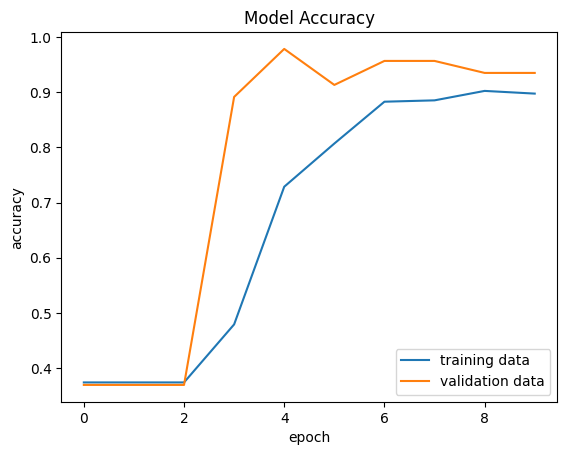

In [33]:
#for the unstandardized data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='lower right')

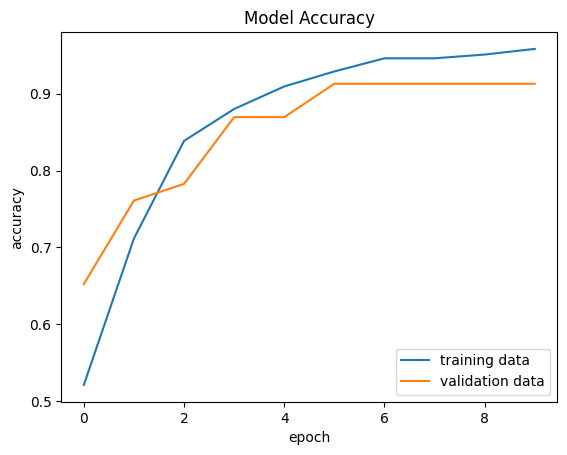

In [34]:
#for the standardized data
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='lower right')

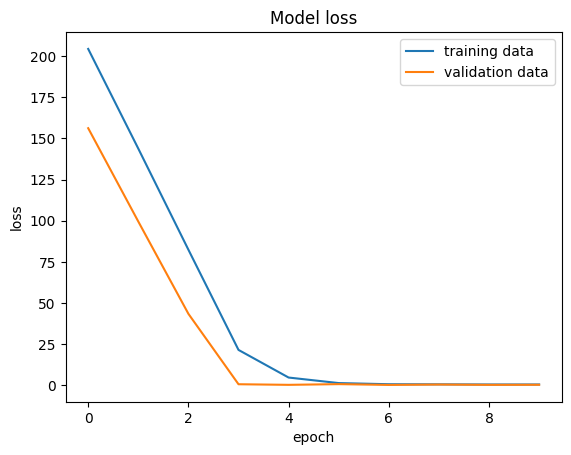

In [35]:
#for the unstandardized data as loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='upper right')

**## [To get the accuracy of the model on the test data**

In [37]:
loss ,accuracy=model.evaluate(x_test_std,y_test)#evaluate function will itself get the accuracy
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1093 - accuracy: 0.9649
0.9649122953414917


In [38]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [40]:
y_pred=model.predict(x_test_std)

4/4 [==============================] - 0s 4ms/step


In [42]:
print(y_pred.shape)
print(y_pred[0])#this function will give me the probability of the label to be 1(0.7358) 0r 0(0.281)

(114, 2)
[0.735812  0.2812064]


In [43]:
print(x_test_std)

[[ 0.44199702  0.212229    0.42163229 ...  0.50566574  1.76577066
   1.29575996]
 [-0.40269822 -1.65031591 -0.45179655 ... -0.4843214  -0.18151318
   0.64044108]
 [-0.26422359 -0.43781762 -0.32110392 ... -0.9749425  -0.19430322
  -0.6222737 ]
 ...
 [ 0.20659015  0.7377986   0.40152573 ...  2.00738244 -0.03602646
   1.80285195]
 [ 1.56087203  1.33482723  1.53955686 ...  0.88712591  0.66582708
   0.08375438]
 [-0.64918307 -0.44703814 -0.67739211 ... -1.07505695  0.49795778
  -0.96887944]]


In [44]:
print(y_pred)

[[0.735812   0.2812064 ]
 [0.0561338  0.89092475]
 [0.06636232 0.73319244]
 [0.04611028 0.80207235]
 [0.07079922 0.6700762 ]
 [0.24772875 0.5360716 ]
 [0.14674172 0.86728454]
 [0.14261742 0.7431945 ]
 [0.19791345 0.80034125]
 [0.13189729 0.8007785 ]
 [0.6810839  0.22071084]
 [0.86702275 0.13691665]
 [0.06454289 0.84477645]
 [0.10607476 0.44596964]
 [0.9299796  0.0930017 ]
 [0.37991476 0.56312567]
 [0.05696491 0.8473147 ]
 [0.0307413  0.8741187 ]
 [0.09548409 0.6459957 ]
 [0.29198867 0.5074809 ]
 [0.43681937 0.46057704]
 [0.89700186 0.17125574]
 [0.7131322  0.19295342]
 [0.07758897 0.6207657 ]
 [0.19922942 0.7400086 ]
 [0.0539881  0.83299464]
 [0.79283404 0.26525897]
 [0.73634416 0.30069658]
 [0.18211734 0.5392239 ]
 [0.05759549 0.8235535 ]
 [0.09194306 0.7278463 ]
 [0.12132288 0.75209   ]
 [0.12107479 0.8393828 ]
 [0.256369   0.5352714 ]
 [0.17893724 0.8035436 ]
 [0.9527336  0.18357518]
 [0.7077848  0.22345296]
 [0.13847406 0.9392591 ]
 [0.96195143 0.06563459]
 [0.7781604  0.30647323]


Model.predict give me prediction probability of each class for that datapoint

In [46]:
#argmax function
my_list=[10,40,30]
index_of_max_value=np.argmax(my_list)#np.argmax function tries to find the index of the maximum value
print(my_list)
print(index_of_max_value)

[10, 40, 30]
1


In [47]:
#converting the prediction probabolity to class labels
y_pred_labels=[np.argmax(i) for i in y_pred]#maximum value in the list y_pred use the for loop

In [48]:
print(y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


## **Building a predictive system**

In [51]:
input_data=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)
#change tuple into np array
input_data_as_np_array=np.asarray(input_data)
#reshpae the data
input_data_reshaped=input_data_as_np_array.reshape(1,-1)
#standardize the input data
input_data_std=scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_std)
print(prediction)

#now the prediction is in the form of probability so change into class labels
prediction_labels=np.argmax(prediction)
print(prediction_labels)

if(prediction_labels ==0):
  print("The tumor is malignanat.")
else:
  print("The tumor is Benign.")







1/1 [==============================] - 0s 24ms/step
[[0.62215036 0.26359588]]
0
The tumor is malignanat.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
input_data=(8.878,15.49,56.74,241,0.08293,0.07698,0.04721,0.02381,0.193,0.06621,0.5381,1.2,4.277,30.18,0.01093,0.02899,0.03214,0.01506,0.02837,0.004174,9.981,17.7,65.27,302,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431)
#change tuple into np array
input_data_as_np_array=np.asarray(input_data)
#reshpae the data
input_data_reshaped=input_data_as_np_array.reshape(1,-1)
#standardize the input data
input_data_std=scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_std)
print(prediction)

#now the prediction is in the form of probability so change into class labels
prediction_labels=np.argmax(prediction)
print(prediction_labels)

if(prediction_labels ==0):
  print("The tumor is malignanat.")
else:
  print("The tumor is Benign.")







1/1 [==============================] - 0s 22ms/step
[[0.0286513  0.92997676]]
1
The tumor is Benign.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
